In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('Effectifs_pooled.csv')
df.head()

,datetime,Réel,Prévision,joursem,isoweek
0,2011-01-03,11127.0,11905.0,0,1
1,2011-01-04,11800.0,12172.0,1,1
2,2011-01-06,11723.0,12363.0,3,1
3,2011-01-07,12320.0,12423.0,4,1
4,2011-01-10,11281.0,11932.0,0,2


In [3]:
df['datetime']=pd.to_datetime(df['datetime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   1431 non-null   datetime64[ns]
 1   Réel       1431 non-null   float64       
 2   Prévision  1431 non-null   float64       
 3   joursem    1431 non-null   int64         
 4   isoweek    1431 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 56.0 KB


In [5]:
df['Mois']= df['datetime'].apply( lambda dt1 : dt1.month)
df.head()

,datetime,Réel,Prévision,joursem,isoweek,Mois
0,2011-01-03,11127.0,11905.0,0,1,1
1,2011-01-04,11800.0,12172.0,1,1,1
2,2011-01-06,11723.0,12363.0,3,1,1
3,2011-01-07,12320.0,12423.0,4,1,1
4,2011-01-10,11281.0,11932.0,0,2,1


In [6]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['Mois','joursem']])
enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64)]

In [7]:
X = enc.transform(df[['Mois','joursem']]).toarray()
y = df['Réel']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model_fit = model.fit(X_train, y_train)

In [10]:
model_fit.coef_

array([-2.77055480e+16, -2.77055480e+16, -2.77055480e+16, -2.77055480e+16,
       -2.77055480e+16, -2.77055480e+16, -2.77055480e+16, -2.77055480e+16,
       -2.77055480e+16, -2.77055480e+16, -2.77055480e+16,  3.05807891e+14,
        3.05807891e+14,  3.05807891e+14,  3.05807891e+14,  3.05807891e+14])

In [11]:
model_fit.intercept_

2.7399740154346344e+16

In [12]:
y_train_pred = model_fit.predict(X_train)
y_test_pred = model_fit.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df_metric = pd.DataFrame( {'MSE': [mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)],
                           'r2': [r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)]}, index=['Train','Test'] )

df_metric.head()

,MSE,r2
Train,2.085268e+06,0.137664
Test,2.286690e+06,0.089577


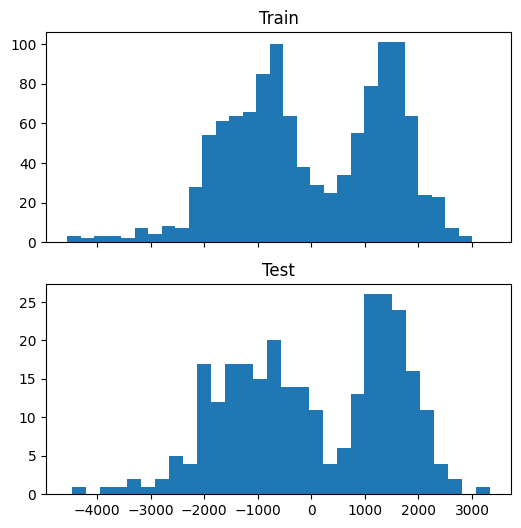

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6), sharex=True)
ax1.set_title('Train')
ax1.hist(y_train-y_train_pred, bins = 30)
ax2.set_title('Test')
ax2.hist(y_test-y_test_pred, bins = 30)
plt.show()

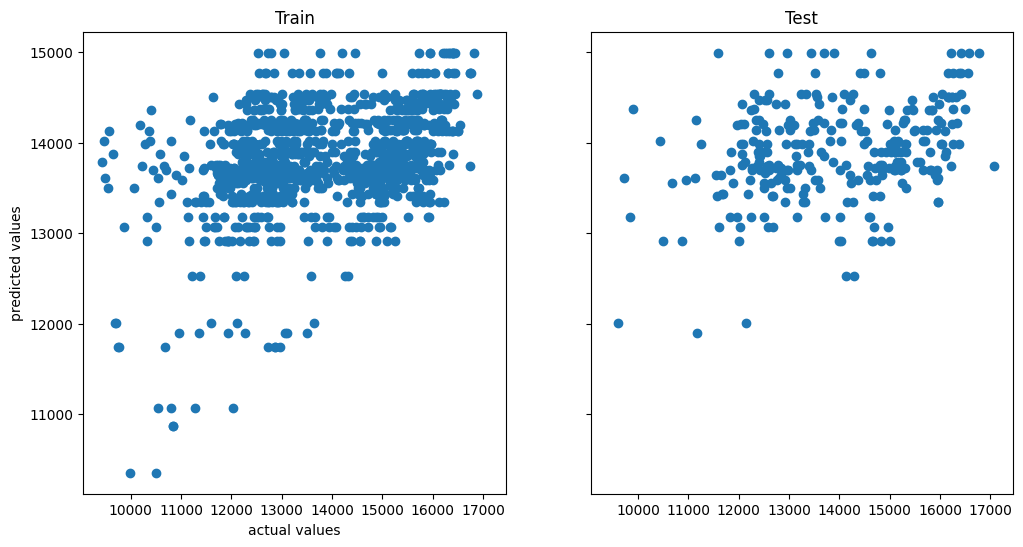

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax1.set_title('Train')
ax1.set_xlabel('actual values')
ax1.set_ylabel('predicted values')
ax1.scatter(x=y_train, y=y_train_pred)
ax2.set_title('Test')
ax2.scatter(x=y_test, y=y_test_pred)
plt.show()

In [17]:
type(y_test_pred)

numpy.ndarray